Perform an analysis of the dataset(s) used in Homework #2 using the SVM algorithm. Compare the results with the results from previous homework.

Homework #3
Read the following articles:
https://www.hindawi.com/journals/complexity/2021/5550344/
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8137961/
Search for academic content (at least 3 articles) that compare the use of decision trees vs SVMs in your current area of expertise.
Perform an analysis of the dataset used in Homework #2 using the SVM algorithm.
Compare the results with the results from previous homework.
Answer questions, such as:
Which algorithm is recommended to get more accurate results?
Is it better for classification or regression scenarios?
Do you agree with the recommendations?
Why?
Format
Essay (minimum 500 word document)
Write a short essay explaining your selection of algorithms and how they relate to the data and what you are trying to do
Analysis using R or Python (submit code + errors + analysis as notebook or copy/paste to document)
Include analysis R (or Python) code.


Pre-work:

1. Read the following articles:
            A) https://www.hindawi.com/journals/complexity/2021/5550344/
            B) https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8137961/

2. Search for academic content (at least 3 articles) that compare the use of decision trees vs SVMs in your current area of expertise. 

Discuss the articles provided (1 A & B, above), the 3 you chose, and how they relate to your your area of interest

Deliverable

1. Perform an analysis of the dataset used in Homework #2 using the SVM algorithm.

2. Compare the results with the results from previous homework.

     - Answer questions, such as:

     - Which algorithm is recommended to get more accurate results?

     -   Is it better for classification or regression scenarios?

     -   Do you agree with the recommendations?

     -   Why?

In [50]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 6)

## Exploratory Data Analysis

In [51]:
#| echo : false

# load preprocessed data from hw2

data = pd.read_csv('c:/Users/nickc/DataScience/NickAMC.github.io/D622-S24/hw2/airline_df_pp.csv').drop('index', axis =1)

In [52]:
data.head()

,Seat Comfort,Cabin Staff Service,Ground Service,Food & Beverages,Inflight Entertainment,Value For Money,Review Sentiment,Seat_Types_Business Class,Seat_Types_Economy Class,Seat_Types_First Class,Seat_Types_Premium Economy,Type_of_Travellers_Business,Type_of_Travellers_Couple Leisure,Type_of_Travellers_Family Leisure,Type_of_Travellers_Solo Leisure,Recommended
0,1.0,1.0,2.0,1.0,3.0,1,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,no
1,1.0,3.0,1.0,2.0,1.0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,no
2,1.0,1.0,1.0,1.0,1.0,1,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,no
3,3.0,2.0,1.0,3.0,3.0,3,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no
4,2.0,2.0,1.0,2.0,3.0,1,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,no


In [53]:
X = data.drop('Recommended', axis = 1)
y = data['Recommended']

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1739 entries, 0 to 1738
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Seat Comfort                       1739 non-null   float64
 1   Cabin Staff Service                1739 non-null   float64
 2   Ground Service                     1739 non-null   float64
 3   Food & Beverages                   1739 non-null   float64
 4   Inflight Entertainment             1739 non-null   float64
 5   Value For Money                    1739 non-null   int64  
 6   Review Sentiment                   1739 non-null   int64  
 7   Seat_Types_Business Class          1739 non-null   float64
 8   Seat_Types_Economy Class           1739 non-null   float64
 9   Seat_Types_First Class             1739 non-null   float64
 10  Seat_Types_Premium Economy         1739 non-null   float64
 11  Type_of_Travellers_Business        1739 non-null   float

In [83]:
print(f'This dataset has {data.shape[0]} rows and {data.shape[1]} columns!!!')

This dataset has 1739 rows and 16 columns!!!


#### Boxplots for each Attribute of the Airline

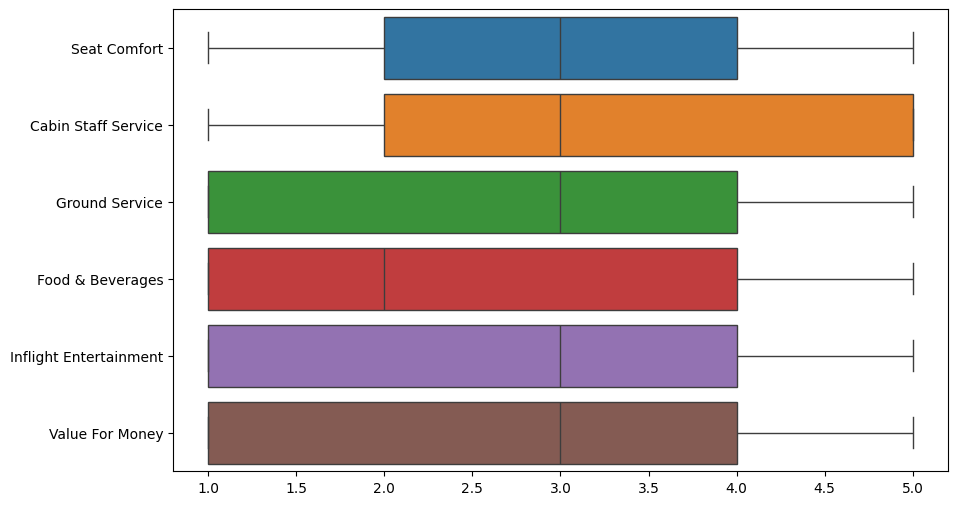

In [54]:
sns.boxplot(data.iloc[:,:6], orient='h')
plt.show()

#### Distribution of the Attributes

In [86]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Seat Comfort,1739.0,2.824037,1.371281,1.0,2.0,3.0,4.0,5.0
Cabin Staff Service,1739.0,3.209316,1.471988,1.0,2.0,3.0,5.0,5.0
Ground Service,1739.0,2.917769,1.418122,1.0,1.0,3.0,4.0,5.0
Food & Beverages,1739.0,2.615871,1.427456,1.0,1.0,2.0,4.0,5.0
Inflight Entertainment,1739.0,2.658424,1.378176,1.0,1.0,3.0,4.0,5.0
Value For Money,1739.0,2.642898,1.428229,1.0,1.0,3.0,4.0,5.0
Review Sentiment,1739.0,0.561242,0.496378,0.0,0.0,1.0,1.0,1.0
Seat_Types_Business Class,1739.0,0.304773,0.460444,0.0,0.0,0.0,1.0,1.0
Seat_Types_Economy Class,1739.0,0.478436,0.499678,0.0,0.0,0.0,1.0,1.0
Seat_Types_First Class,1739.0,0.079931,0.271264,0.0,0.0,0.0,0.0,1.0


There are 7 rated features of each review ranging from 1-5. 

For seat types are there are 4 unique classes: Economy, Business, First Class, and Premium Economy.

This data also collected the information of the types of passengers: solo, couple, family, and business.

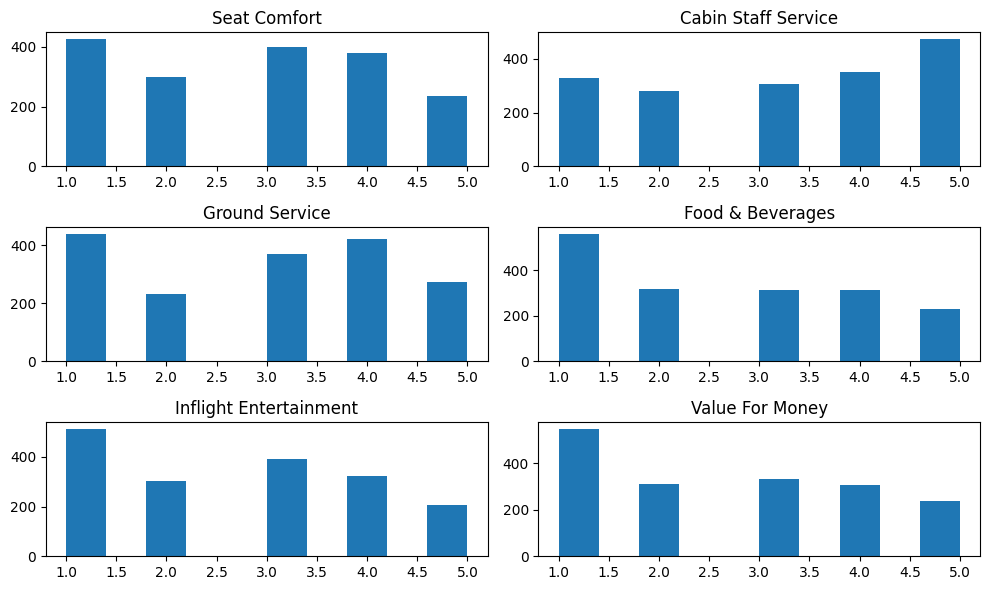

In [61]:
data.iloc[:,:6].hist(grid=False)
plt.tight_layout()
plt.show()

#### Are the classes in `Recommended` equal/balanced?

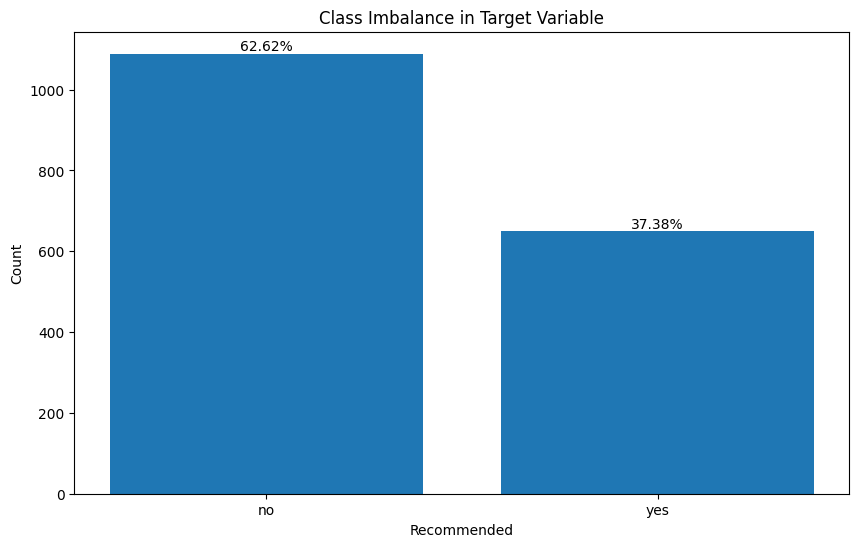

In [56]:
class_counts = data['Recommended'].value_counts()

plt.bar(class_counts.index, class_counts.values) # type: ignore
plt.xlabel('Recommended')
plt.ylabel('Count')
plt.title('Class Imbalance in Target Variable')

total = sum(class_counts.values)
for i, count in enumerate(class_counts.values):
     percentage = count / total * 100
     plt.text(i, count, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()

### Correlation Matrix of Features

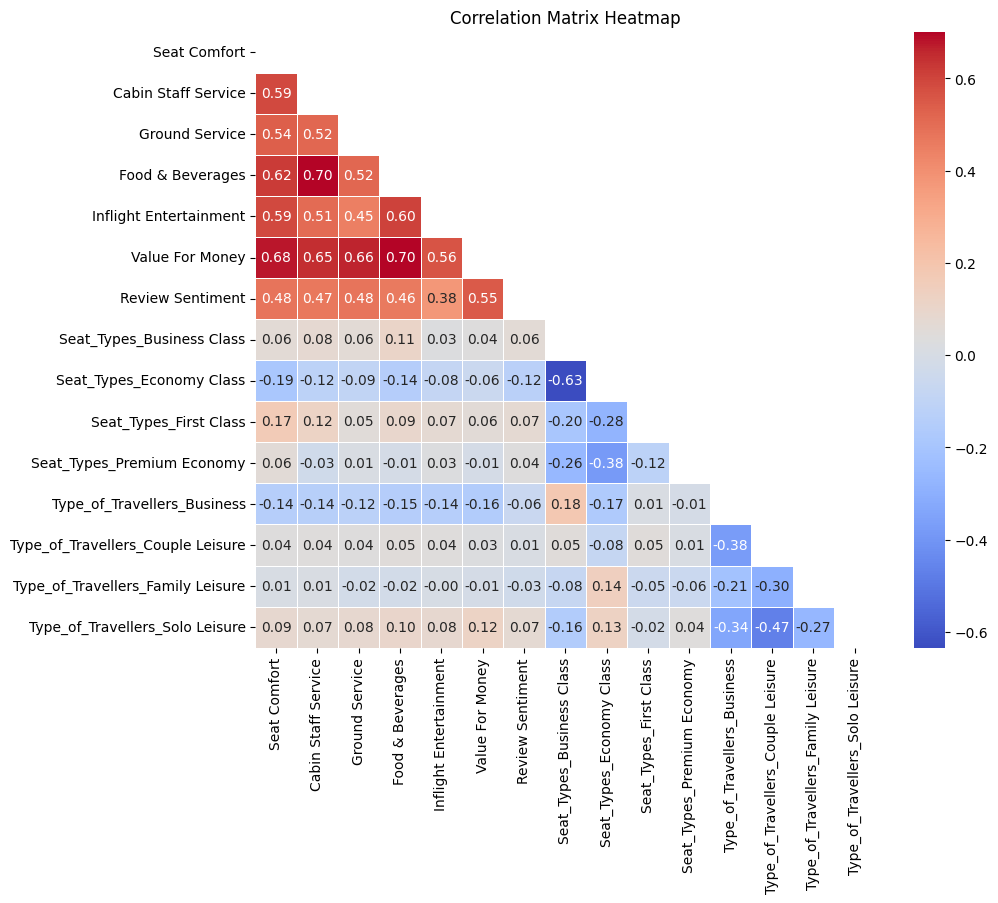

                                   Seat Comfort  Cabin Staff Service  \
Seat Comfort                           1.000000             0.590066   
Cabin Staff Service                    0.590066             1.000000   
Ground Service                         0.536967             0.516243   
Food & Beverages                       0.622409             0.701508   
Inflight Entertainment                 0.589565             0.507780   
Value For Money                        0.677088             0.645067   
Review Sentiment                       0.479911             0.466739   
Seat_Types_Business Class              0.060381             0.079852   
Seat_Types_Economy Class              -0.187760            -0.115893   
Seat_Types_First Class                 0.169310             0.120904   
Seat_Types_Premium Economy             0.058434            -0.033901   
Type_of_Travellers_Business           -0.142421            -0.137160   
Type_of_Travellers_Couple Leisure      0.035523             0.04

In [88]:
correlation_matrix = X.corr()

corr_matrix = X.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, ax=ax)

plt.title('Correlation Matrix Heatmap')

plt.show()
print(correlation_matrix)


# Support Vector Model

In [57]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


In [58]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

SEED = 123

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state= SEED, stratify=y)

params_grid = {
     'C' : [0.1, 1, 10, 100],
     'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
     'gamma' : [0.001, 0.01, 0.1],
     }

svc = SVC(random_state=SEED)

grid_search = GridSearchCV(svc, params_grid, cv =5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(best_params)

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


In [67]:
model = SVC(C=1, gamma=0.01, kernel='rbf')

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(f'SVM Classifier Accuracy: {accuracy_score(y_test, y_pred):.3%}')

SVM Classifier Accuracy: 93.678%


In [89]:
model

array([1., 1.])

# Comparison of Decision Tree, Random Forest and Support Vector Machine for Classification

Recall from hw2, that the models' accuracies were:

* DT Model 1 Accuracy: 90.805%

* DT Model 2 Accuracy: 87.356%
     
* RandomForestClassifier Model Accuracy: 92.816%

In this analysis, we compare the performance of two popular models the SVM classifier and RF classifier. The results of these models was based on their accuracies on the test set. The SVM classifier exhibited an accuracy of 93.678%, slightly higher than the RF classifier with an accuracy of 92.816%. The difference in accuracy showcases that the SVM has a marginally better predictive power.

The selection of the two models depends on the specific goals of the task. If the main goal is to provide a model whose outcomes can be easily explained and interpreted by decision-makers, the RF model would be prefered. Conversely, if we aim to achieve the highest level of predictiv accuracy, the SVM model is the better choice. 

For this task, our analysis recommends the use of the RF model for its interpretability and comparable accuracy on the test set.

___

# Comparative Analysis

Provided Articles: 
* https://www.hindawi.com/journals/complexity/2021/5550344/
* https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8137961/

The use of Decision Trees and Support Vector Machine on COVID-19 Infection Predicition

Direct Marketing Campaigns with DT and SVM: (found via google scholar)

* https://www.scirp.org/html/6-9301587_30463.htm
* https://www.sciencedirect.com/science/article/abs/pii/S0167865510003648
* https://www.mdpi.com/0718-1876/17/3/51
* https://www.frontiersin.org/journals/neuroscience/articles/10.3389/fnins.2018.00076/full


After undertaking this analysis, it became evident that SVM models hold the predictive edge over decision trees. However, despspite its better performance metrics, SVM falls short in its interpretability. The complexity of SVM especially when using the kernel trick to deal with nonlinear data makes it difficult to explain how decision are made, which can be important when dealing with an audience outside this domain.

The two articles provided demonstrates the use case of support vector machines and decision tree with a goal to predict COVID-19 infections. Each article investigates the effectiveness of each machine learning methods using laboratory tests data. The main focus of both articles encountered with the imbalance of classes meaning there are more data for one class relative to the rest. The research articles utilized performance metrics such as the F-statistic, precision, recall, area under the precision-recall curve and area under the receiver operating characteristic curve. It found that ensemble models were, on average, performed better for imbalanced data.

For instance, the COVID-19 prediction with decision trees of this [study](https://www.hindawi.com/journals/complexity/2021/5550344/#results-and-discussion), they incorporated resampling techniques to manage the data imbalance. Then, fitted models like XGBoost, Random Forest, and other boosted and bagged decision trees. A remarkable finding was that using age as an important feature resulted in the a performance across the model, which is a leading indicator that demongraphic data such as age paired with laboratory data can greatly improve the models predictive capabilities. 

Whereas, using SVM for COVID-19 prediction in this [study](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8137961/). the SVM model not only showed strong predictive metrics but also outperformed other ml models such as random forest, KNN, decision tree, naive bayes, and adaboost. Looking at the confusion matrix towards the end of the paper, it demonstrates that the SVM model consistently classifies the correct 3 classes compared to the other models which are inconsistent in their classification.

Another application of decision trees can be found in this [study](https://www.scirp.org/html/6-9301587_30463.htm) analysis for direct marketing campaigns. In this paper, it explores the effectiveness of decision trees and naive bayes model to create decision for direct marketing. Throughout, the study it compares these algorithms based on the metrics such as accuracy, precision and AUC, surprisely no recall, and the use of data mining to enhance marketing campaigns. Specifically, it explores how the alogrithms can be used to predict customer behavior such as subscribing to term deposit.

These academic articles all showcase the strengths and weaknesse of SVM and DT models in prediction COVID-19 infections and their application in other industries in this case was for marketing campaign purposes. These studies indicate that SVM tend to have the better predictions over decision tres and other models, we know SVM can handle nonlinear and more complex datasets. However, the complexity of SVMs especially when using kernel trick for nonlinear boundaries raises a difficulty in interpretability, which is pivotal when conveying findings or insights to laymen. We saw how both machine learning models addressing class imbalance in the data, with some implementing resampling techiniques and other using performance metrics that can properly gauge the performance of the model. Metrics such as the F1 score, precision, recall, AUPR, and AUROC. As seen in these articles of differing application from healthcare to business marketing, the choice between SVM and decision tree can decide by balancing the prediction power and interpretability.



---